<h1 style="text-align:center; color:#e64500ff;">Class 03 Return Picture</h1>

回顾并运用2种向量化操作   
用markdown语句标注了月度原始收益率计算公式并在季度、年度试了试对数收益率，再转换   
用markdown语句标注了时间平方根法则     


In [79]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import calendar
import statsmodels.formula.api as smf  # OLS regression ols回归用于建立一个或多个自变量与因变量之间线性关系模型

from matplotlib import style # 画图模块
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates # 画时间序列图
import matplotlib.ticker as mtick # 画百分比图
import seaborn as sns  # 数据可视化模块
#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'
#设置列不限制数量
pd.set_option('display.max_columns', None)

In [80]:
data = pd.read_csv('./000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d') #更改Day列格式为XXXX-XX-XX
data.set_index('Day', inplace = True) #重建行索引为Day列
data.sort_values(by = ['Day'], ascending=True) #Day列升序排序

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [81]:
data_new = data['1995-01':'2024-07'].copy() #截取1995-01至2024-07时间段数据
data_new['Close'] = pd.to_numeric(data_new['Close']) #pd.to_numeric数据类型转成数值型，后续计算准备
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种方法：
#法1  向量化操作:（当日收盘价-前一日收盘价）/前一日收盘价
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1     #向量化操作:（当日收盘价-前一日收盘价）/前一日收盘价
#法2  另一种向量化操作diff和div结合  diff创建一个新序列，其中每个位置的值都是 “当前收盘价”减去“前一个收盘价” 的差。shift(1)会创建一个新序列，其中每个位置的值都是原序列中前一个位置
data_new['diffanddiv_return'] = data_new['Close'].diff() / data_new['Close'].shift(1) 
#计算对数收益率
data_new['Log_return'] = np.log(data_new['Close']) - np.log(data_new['Preclose'])
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return,diffanddiv_return,Log_return
Day,,,,,,,,
1995-01-03,647.8700,637.7200,647.7100,630.5300,639.8800,-0.012333,NaN,-0.012409
1995-01-04,639.8800,641.9000,655.5100,638.8600,653.8100,0.021770,0.021770,0.021536
1995-01-05,653.8100,655.3800,657.5200,645.8100,646.8900,-0.010584,-0.010584,-0.010641
1995-01-06,646.8900,642.7500,643.8900,636.3300,640.7600,-0.009476,-0.009476,-0.009521
1995-01-09,640.7600,637.5200,637.5500,625.0400,626.0000,-0.023035,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,-0.005241,-0.005241,-0.005255
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,0.001440,0.001440,0.001439
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,0.000328,0.000328,0.000328


<font size="6" color=#87CEEB>✨月度收益率计算公式为：✨</font> 

\begin{align*}
R_{\text{month}} = \prod_{t \in \text{当月}} (1 + R_t) - 1
\end{align*}

其中：
- $R_t$ 表示原始日收益率；
- $\prod$ 表示连乘积；
- $R_{\text{month}}$ 表示该月的累计收益率。

In [82]:
#月度收益率计算
#.resample()用于划分时间戳，'ME'为按月 .apply应用公式计算月收益率，返回Series结构，再用to_frame 转换为DataFrame，为后续增加列做准备，不然报错
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


In [83]:
#用对数收益率可加性计算季度收益率
Quarter_data = data_new.resample('QE')['Log_return'].sum().to_frame(name='Ret_log') #累加
Quarter_data['Ret'] = np.exp(Quarter_data['Ret_log']) - 1 #.exp(x) 为求e的x次
Quarter_data

,Ret_log,Ret
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2023-09-30,-0.029020,-0.028603
2023-12-31,-0.044553,-0.043575
2024-03-31,0.022019,0.022263


In [84]:
Year_data = data_new.resample('YE')['Log_return'].sum().to_frame(name='Ret_log')
Year_data['Ret'] = np.exp(Year_data['Ret_log']) - 1
Year_data

,Ret_log,Ret
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


<font size="6" color=#87CEEB>✨时间平方根法则公式说明：✨</font>

\begin{align*}
\sigma_{\text{长期}} = \sigma_{\text{短期}} \times \sqrt{T}
\end{align*}

其中：
- $\sigma_{\text{长期}}$ 表示长期波动率（年化波动率）；
- $\sigma_{\text{短期}}$ 表示短期波动率（日、月、周波动率）；
- $T$ 表示短期转化为长期比例因子。




In [85]:
# 为月度收益创建辅助字段，便于深入分析
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')   #格式化为月份的缩写名称。%b - 月份的缩写    %B - 月份的全称（January...)   %m - 月份的数字表示(01...)
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
#创建12个月的滚动窗口，至少需要12个有效数据点,滚动年化收益率计算
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
#滚动年化波动率计算,计算12个月滚动窗口的标准差（月波动率）,将月波动率年化（根据时间平方根法则）
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data


,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1995-01-31,-0.131631,1995,1,Jan,1990,NaN,NaN
1995-02-28,-0.023694,1995,2,Feb,1990,NaN,NaN
1995-03-31,0.177803,1995,3,Mar,1990,NaN,NaN
1995-04-30,-0.103552,1995,4,Apr,1990,NaN,NaN
1995-05-31,0.207922,1995,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-31,0.008622,2024,3,Mar,2020,-0.070792,0.134004
2024-04-30,0.020932,2024,4,Apr,2020,-0.065733,0.135051
2024-05-31,-0.005801,2024,5,May,2020,-0.036745,0.130866


<font size="6" color=#87CEEB>✨数据可视化✨</font><font size="5" color= #e8500aff>显示与可视化</font>   

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定字体为SimHei（黑体）     
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

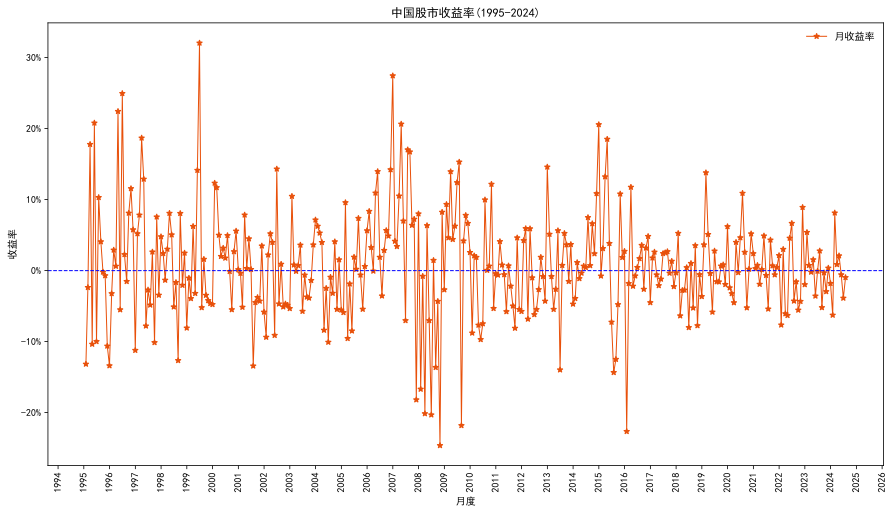

In [116]:
# 画图 月收益率
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定字体为SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
fig, ax = plt.subplots(figsize=(15, 8)) # 图片比例
ax.plot(
    'Ret',  # 使用正确的列名 Ret
    '*-',  # 线的类型
    color = "#e8500aff",  # 线的颜色 RGB
    label = '月收益率',  # 更改为中文标签
    linewidth = 1,  # 线的粗细
    data = Month_data['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("中国股市收益率(1995-2024)") # 更简洁的标题
ax.set_xlabel('月度') # 将x轴名称改为中文
plt.ylabel('收益率') # 将y轴名称改为中文

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y') # 只显示年份
ax.xaxis.set_major_formatter(date_format) # 设置x轴的日期格式

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # 将y轴设置为百分比格式

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90) # 旋转x轴标签

# 添加图例
plt.legend(loc='upper right', frameon=False, fontsize=10) #frameon=False图例无边框

# 图例添加在具体的位置
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=10)

# 添加水平参考线表示零收益
ax.axhline(y=0, color='blue', linestyle='--', linewidth=1.0)

# 保存图片
fig.savefig('./Monthly_return.pdf', bbox_inches='tight')
plt.show();

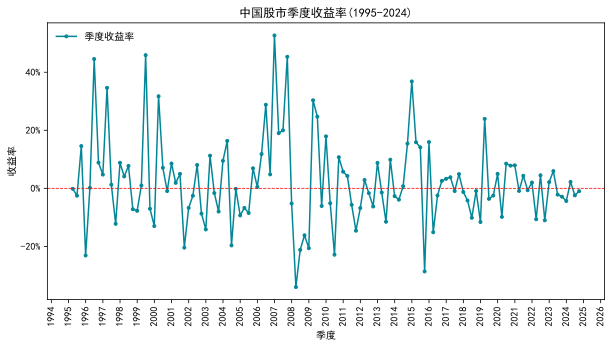

In [115]:
# 画图 季收益率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定字体为SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    Quarter_data.index,  # x轴数据
    Quarter_data['Ret'],  # y轴数据
    '.-',  # 线的类型
    color = "#038798",  # 线的颜色 RGB
    label = '季度收益率',  # 更改为季度收益率标签
    linewidth = 1.5,  # 线的粗细
)
ax.set_title("中国股市季度收益率(1995-2024)") # 更精确的标题
ax.set_xlabel('季度') # 更改x轴名称
plt.ylabel('收益率') # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 添加水平参考线表示零收益
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.8)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)
fig.savefig('./Yearly_return.pdf', bbox_inches='tight')
fig.savefig('./Quarterly_return.pdf', bbox_inches='tight')
plt.show();

Text(0.5, 1.0, '中国股市年度收益率(1995-2024)')

Text(0.5, 0, '年')

Text(0, 0.5, '收益率')

(array([ 8766.,  9131.,  9496.,  9862., 10227., 10592., 10957., 11323.,
        11688., 12053., 12418., 12784., 13149., 13514., 13879., 14245.,
        14610., 14975., 15340., 15706., 16071., 16436., 16801., 17167.,
        17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.,
        20454.]),
 [Text(8766.0, 0, '1994'),
  Text(9131.0, 0, '1995'),
  Text(9496.0, 0, '1996'),
  Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

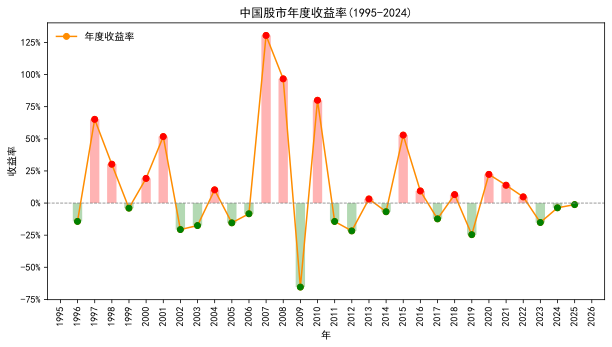

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))  # 图片比例

# Plot the line
ax.plot(
    Year_data.index,  # x轴数据
    Year_data['Ret'],  # y轴数据
    'o-',  # 线的类型，使用圆点标记每年的数据点
    color='#FF8C00',  # 线的颜色，使用橙色以区分月度和季度图
    label='年度收益率',  # 更改标签为年度收益
    linewidth=1.5,  # 线的粗细，略微加粗以突出年度数据
)

# For each data point, change the marker color based on the value
for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.plot(Year_data.index[i], Year_data['Ret'].iloc[i], marker='o', markersize=6, markerfacecolor='red', markeredgecolor='red', linestyle='') 
    else:
        ax.plot(Year_data.index[i], Year_data['Ret'].iloc[i], marker='o', markersize=6, markerfacecolor='green', markeredgecolor='green', linestyle='')  
# 图标题和轴标签
ax.set_title("中国股市年度收益率(1995-2024)")
ax.set_xlabel('年')  # 更改x轴名称
ax.set_ylabel('收益率')  # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 为正负收益添加不同颜色的填充
for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='red')
    else:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='green')

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)

# 保存图片到images文件夹

plt.show()

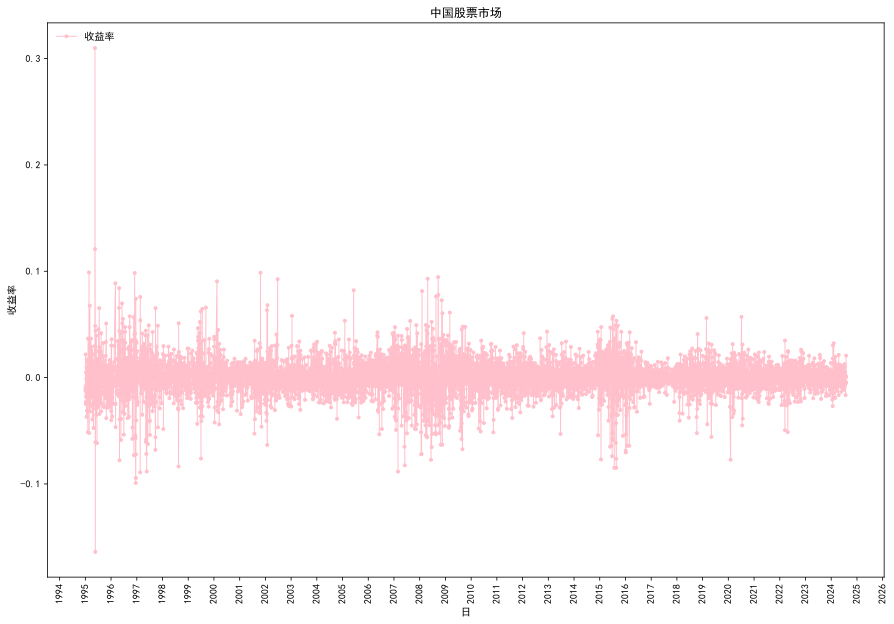

In [114]:
# 画图
fig, ax = plt.subplots(figsize=(15, 10)) # 图片比例
ax.plot(
    'Raw_return',  # 要画图的变量名
    '.-',  # 线的类型
    color = 'pink',  # 线的颜色 RGB
    label = '收益率',  # 这个是线的类别，主要是在多条线画图的时候，起到区别的作用，单条线这个没有影响
    linewidth = 1,  # 线的粗细
    data = data_new['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("中国股票市场") # 画图的标题
ax.set_xlabel('日') # 画图的x轴名称
plt.ylabel('收益率') # 画图的y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# # 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator())

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)
fig.savefig('./Daily_return.pdf', bbox_inches='tight')# 更改输出图片格式 jpg
plt.show();

<font size="6" color=#87CEEB>✨累计收益与最大回撤✨</font><font size="5">     
通过累计收益率和最大回撤可以快速判断长期投资的盈亏路径及风险暴露。回撤绝对值越小越好       
- Drawdown = 当前收益率 - 该点前历史最高收益率
- Max Drawdown = 最大的回撤
- 最大回撤出现的时间

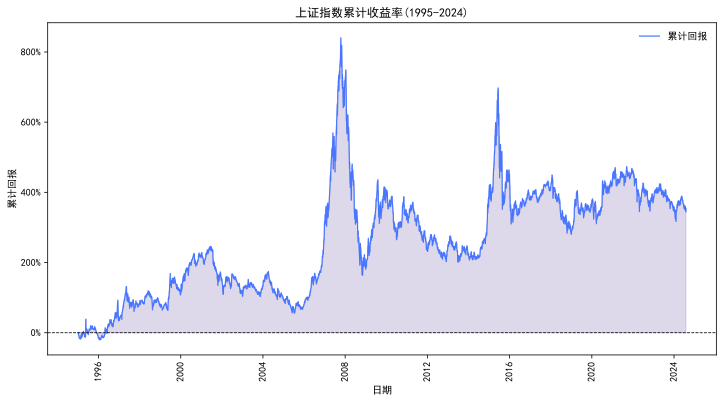

In [119]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1  #.cumprod()累积
#上证指数累计收益率（基准=0）
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color='#4876FF', linewidth=1.2, label='累计回报')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#1F037D", alpha=0.15)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('上证指数累计收益率(1995-2024)')
ax.set_xlabel('日期')
ax.set_ylabel('累计回报')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False) # 图例不显示边框
fig.savefig('./Cumulative_return.pdf', bbox_inches='tight')
plt.show();

In [120]:
data_new['Peak'] = data_new['Cum_return'].cummax() # 计算历史最高点
data_new['Drawdown'] = data_new['Cum_return'] - data_new['Peak'] # 计算回撤

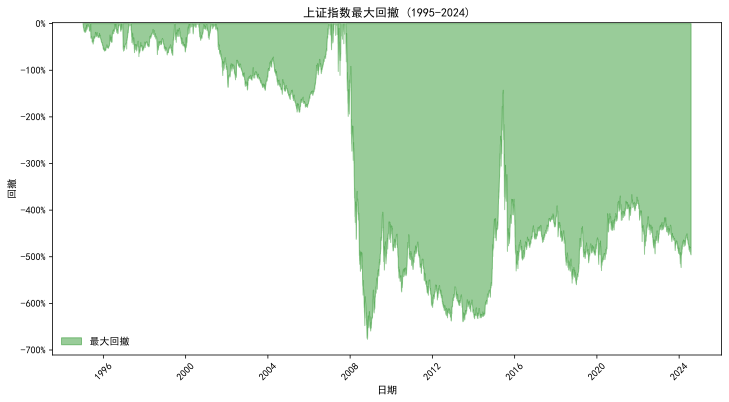

In [126]:
# 最大回撤曲线，关注下行风险
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(data_new.index, data_new['Drawdown'], 0, color='green', alpha=0.4, label='最大回撤')  #填充的颜色透明度alpha=0.6
ax.set_title('上证指数最大回撤 (1995-2024)')
ax.set_xlabel('日期')
ax.set_ylabel('回撤')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.02)
plt.xticks(rotation=45)
plt.legend(frameon=False)
fig.savefig('./Maximum_drawdown.pdf', bbox_inches='tight')
plt.show();

<font size="5" color=pink>月度收益分布与季节效应</font>      
观察月度收益率的分布形态与不同月份的差异，评估市场的偏态与**季节性**。

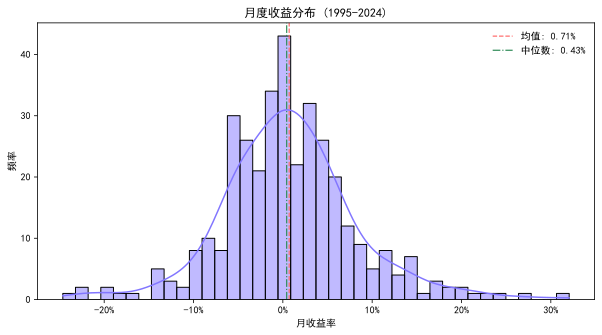

In [134]:
# 月度收益率分布：看集中度与尾部风险
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(Month_data['Ret'].dropna(), bins=40, kde=True, color='#8276FF', ax=ax)
mean_return = Month_data['Ret'].mean()
median_return = Month_data['Ret'].median()
ax.axvline(mean_return, color='#FF6A6A', linestyle='--', linewidth=1.2, label=f"均值: {mean_return:.2%}")
ax.axvline(median_return, color='#2E8B57', linestyle='-.', linewidth=1.2, label=f"中位数: {median_return:.2%}")
ax.set_title("月度收益分布 (1995-2024)")
ax.set_xlabel('月收益率')
ax.set_ylabel('频率')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # x轴百分比格式
plt.legend(frameon=False)
fig.savefig('./Monthly_return_distribution.pdf', bbox_inches='tight')
plt.show();


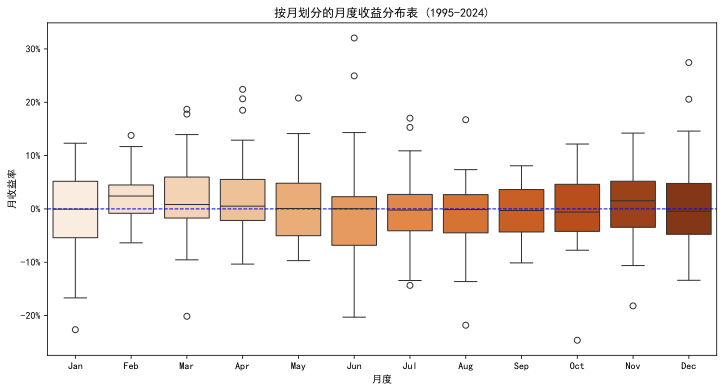

In [138]:
# 箱型图：按月份呈现的月度收益分布情况  清晰地展示数据的分布情况
month_order = list(calendar.month_abbr[1:])
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=Month_data.dropna(subset=['Ret']), x='Month_name', y='Ret', hue='Month_name', order=month_order, palette='Oranges', ax=ax, legend=False)  # hue 表示每个箱线图根据月份着色，进一步区分不同月份。palette='Blues' 选择蓝色系配色方案，使不同月份的箱线图颜色有层次变化。
ax.set_title('按月划分的月度收益分布表 (1995-2024)')
ax.set_xlabel('月度')
ax.set_ylabel('月收益率')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.axhline(y=0, color='blue', linestyle='--', linewidth=1)  # 基准线0
plt.xticks(rotation=0)
fig.savefig('./Monthly_return_boxplot.pdf', bbox_inches='tight')
plt.show();

## 月度收益率热力图
可快速定位高低收益的时间窗口。

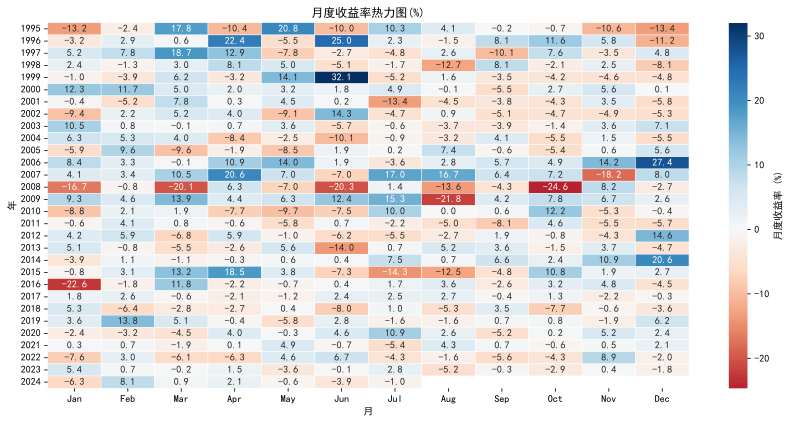

In [141]:
## 为热力图创建一个按年份-月份划分的交叉表
heatmap_data = Month_data.pivot_table(values='Ret', index='Year', columns='Month', aggfunc='first').sort_index()
heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

# #创建热力图
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data * 100, 
            cmap='RdBu',  # 红色（负向）到蓝色（正向）的色图
            center=0,       # 将颜色映射图的中心点定位在零处
            linewidths=0.4, 
            linecolor='white',
            cbar_kws={'label': '月度收益率 (%)'},
            annot=True,     # 在单元格中显示数值
            fmt='.1f',      # 格式设置为小数点后一位
            ax=ax)

ax.set_title('月度收益率热力图(%)')
ax.set_xlabel('月')
ax.set_ylabel('年')

plt.tight_layout()
fig.savefig('./Monthly_heatmap.pdf', bbox_inches='tight')
plt.show();


## 收益率的自相关的图

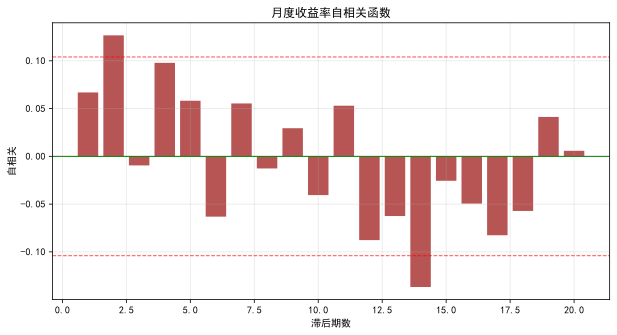

In [ ]:
from statsmodels.tsa.stattools import acf
#月数据自相关图
# 计算自相关函数
lags = 20
autocorr = acf(Month_data['Ret'].dropna(), nlags=lags, fft=True)  #处理缺失数据，删除

# 删除第一个数据点（lag=0，值为1）
autocorr_no_zero = autocorr[1:]

# 绘制自相关图
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, lags+1), autocorr_no_zero, alpha=0.8, color='brown')  #bar柱形图
ax.axhline(y=0, color='green', linewidth=1)
ax.axhline(y=1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('月度收益率自相关函数')
ax.set_xlabel('滞后期数（月）')
ax.set_ylabel('自相关')
ax.grid(True, alpha=0.3)

fig.savefig('./Return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

自相关图展示了时间序列数据在不同滞后期数下的相关性。它显示了当前时间点的数据与过去各个时刻数据之间的关系。    
- 高自相关：如果某个滞后期的自相关值很高（接近 1 或 -1），说明当前数据与过去某个时间点的数据之间有强烈的**线性关系**。 
- 周期性和季节性:如果自相关图在某些特定滞后期（比如 12 个月、4 个季度等）显示出显著的峰值或波动，说明时间序列可能存在周期性或季节性的模式。
- 如果时间序列数据是**平稳**的，那么它的自相关图应该在较大的滞后期数下逐渐趋近于**零**。
- 如果自相关在**较长滞后期数下持续为正**，可能表明数据存在长期的趋势性，即数据随时间有持续**增加**的趋势。


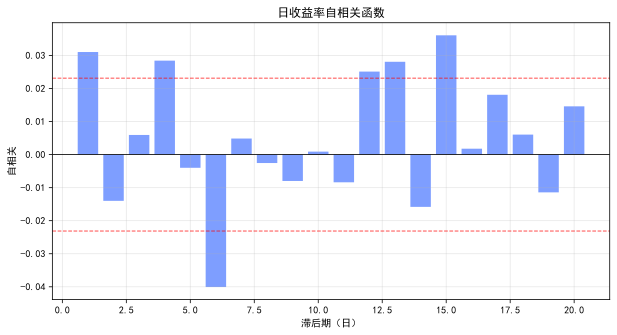

In [ ]:
from statsmodels.tsa.stattools import acf

# 日数据的自相关的图
# 计算自相关函数
lags = 20
daily_autocorr = acf(data_new['Raw_return'].dropna(), nlags=lags, fft=True)

# 删除第一个数据点（lag=0，值为1）
daily_autocorr_no_zero = daily_autocorr[1:]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, lags+1), daily_autocorr_no_zero, alpha=0.7, color='#4876FF')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('日收益率自相关函数')
ax.set_xlabel('滞后期（日）')
ax.set_ylabel('自相关')   
ax.grid(True, alpha=0.3) # 使网格线更淡一些
fig.savefig('./Daily_return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

<font size="6" color=pink>年代分析收益率分布</font>

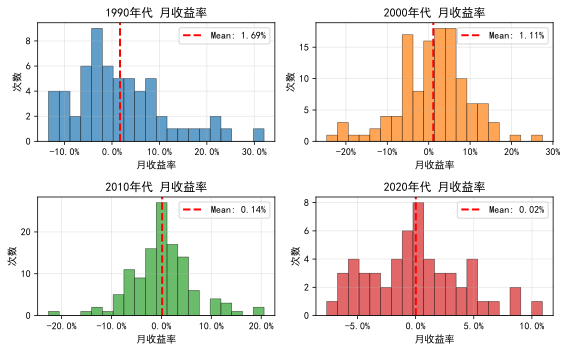

In [ ]:
# 按年代分析收益率分布
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
decades = Month_data['Decade'].unique()
decades = sorted([d for d in decades if not pd.isna(d)])

for i, decade in enumerate(decades):   #enumerate()遍历可迭代对象，列表，元组，每次迭代会返回一个包含两个元素的元组索引、值
    row = i // 2
    col = i % 2
    decade_data = Month_data[Month_data['Decade'] == decade]['Ret'].dropna()
    
    axes[row, col].hist(decade_data, bins=20, alpha=0.7, color=f'C{i}', edgecolor='black', linewidth=0.5)
    axes[row, col].axvline(decade_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {decade_data.mean():.2%}')
    axes[row, col].set_title(f'{int(decade)}年代 月收益率')
    axes[row, col].set_xlabel('月收益率')
    axes[row, col].set_ylabel('次数')
    axes[row, col].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig('./Decades_return_distribution.pdf', bbox_inches='tight')
plt.show();